We are interested in formulating output feedback controllers that use the dynamics of implicit surface representations to find control inputs.  We'd like to be able to verify these controllers via the safety verification method (or something close to that) described in Barry, Majumdar, Tedrake *(2012)*.

Consider a known function $s$ which maps from $[-\frac{\theta_{FOV}}{2},\frac{\theta_{FOV}}{2}]$ to the distance of a UAV, where $S_{max}$ is the moving maximum sensing horizon of the sensor.

$$s: [-\frac{\theta_{FOV}}{2},\frac{\theta_{FOV}}{2}] \rightarrow [0,S_{max}] $$

We like $s$ as a continous function since then we avoid having a hybrid system.  (What do we call a non-hybrid system?)

The distance $s$ may also be thought of as the Euclidean distance from the $0$-level-set of the signed distance function (SDF) for the set of obstacles.  A side-effect benefit of this approach is that we can naturally use implicit surface representations produced by fusion algorithms of depth sensor information (i.e. Kinect Fusion, etc.)

What we need to find is a geometric PDE somewhat of the form:

$$ \frac{\partial}{\partial t}  s(\theta)  = f(s,\psi, u(s))$$



Where $\psi$ is the yaw of the UAV and $u$ is some control input.  The $f$ will contain partial derivatives and may be thought of as an operator. that may be calculated via a reactive controller, for example of the form:

$$ u = k_1\int w_1(\theta)s(\theta)d\theta + k_2\int w_s(\theta)s(\theta)d\theta$$

We need to use a finite dimensional space to approximate the function $s$.

Given some vector of basis functions $\mathbf{w}$ (maybe polynomial basis?) and vector of weights $\mathbf{c}$ we can approximate $s$ as:

$$ s(\theta) \approx c_1w_1(\theta) + c_2w_2(\theta) + ... + c_Nw_n(\theta) $$

Which then gives us a PDE that approximates $f$:

$$ \frac{\partial}{\partial t} s(\theta) \approx \dot{c}_1w_1(\theta) + \dot{c}_2w_2(\theta) + ... + \dot{c}_Nw_N(\theta) $$

$$ \approx f(\psi, u(s))$$

We can now instead think of $f$ as a vector $\mathbf{f}$ which is a function $\mathbf{f}(c_0,c_1,...,c_N,\theta,\dot{\psi)}$, and whose elements are $f_1, f_2, ..., f_N$.  Also write $\mathbf{c}$ as the vector $\mathbf{c} = (c_1,c_2,...,c_N)$.  

We now have an ODE for the weights:

$$ \frac{d}{d t} \mathbf{c} = \begin{pmatrix}
        f_1(\mathbf{c}, \dot{\psi}) \\
        f_2(\mathbf{c}, \dot{\psi}) \\
        \vdots \\
        f_N(\mathbf{c}, \dot{\psi}) \\
        \end{pmatrix} $$



### Assumptions of the environment

Will always assume that there is an obstacle wherever we cannot see.

Can also assume that there are obstacles immediately beyond our maximum sensor distance.

### Memory of environment

We would like to be able to deal with the issue of seeing something, then turning away from it, but being able to remember it was there.  

One way to be able to do this is to have our basis functions defined over the entire domain $[0,2\pi]$.  This generalizes easily to when we have sensors that can see a full 360 degrees. For sensors with limited FOVs, we should make sure our basis functions decay rapidly near the edges.

It is possible that we may naturally impose *memory leakage* if our basis functions cause information outside of our FOV to be naturaly drawn down farther.  One option would be to regularize basis functions outside of the FOV.

### Choice of basis functions

A polynomial basis would naturally lead to SOS.  It may be unclear, however, to know how to stay away from the weights $\textbf{c}$ of polynomial bases.  (It is not clear how each $c_i$ should indicate where obstacles are).

An easy choice of basis functions would be step functions, but then we would worry about hybrid dynamics.

A similar choice but one the preserves continuity is radial basis functions.  Gaussian radial basis functions seem to be a fine choice.  Ani thinks we can still do SOS with linear combinations of Gaussians.

Options:

- polynomials
- trig polynomials
- linear combinations of Gaussians
- inverse quadratic $\phi(r) = \frac{1}{1 + (\epsilon r)^2} $

Set of basis functions needs to be:

- closed under addition
- closed under scaling
- closed under multiplication

### Image space vs. 2D

What is nice about thinking in image space is that we just define distances to obstacles as a function of one variable.

If we think in 2D, then it is more similar to the signed distance function representation.

## Simple 2D, fixed position, rotation-only with a 2D laser scanner

Believe that our PDE is:

$$ \frac{\partial s}{\partial t} = \frac{\partial s}{\partial \theta} \dot{\psi} $$

Where $s(\theta,t)$ is the distance to an obstacle at time $t$ and angle $\theta$, and $\dot{\psi}$ is the rate of rotation of the vehicle.  If we assume that we can directly control the rate of change, then $u = \dot{\psi}$ and we have:

$$ \frac{\partial}{\partial t} s = \frac{\partial}{\partial \theta} u $$

Which simplifies to what we would expect if we can directly change our yaw rate:

$$ \frac{\partial}{\partial t} \theta = \dot{\psi} $$

**Questions**

- How to use SDFs?
- Why use image space rather than project out into 2D / 3D?
- Getting to SOS?

- How do we define what is an obstacle, in terms of $\mathbf{c}$?

- How do we synthesize a controller?

13.0
0.00759128903766
10.4403065089
0.762695692516


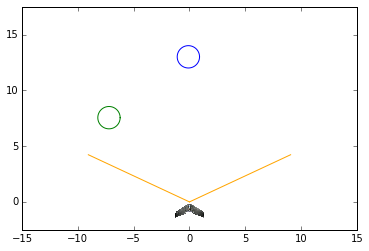

In [1]:
import IPython.html.widgets as widgets
from IPython.display import display
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

from planeVis import plotPlane
theta_slider = widgets.FloatSlider(min=-90, max=90, step=1, value=0)

w=widgets.interactive(plotPlane,theta_deg=theta_slider)
display(w)